In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../dataScience/dsprep/modified_employee_data.csv')

## EDA

In [7]:
df.head()

,employee_id,designation,no_of_trainings,length_of_service,avg_training_score,is_promoted,feedback_score
0,65438,Sales & Marketing,1,8,49.0,0,38
1,65141,Operations,1,4,60.0,0,51
2,7513,Sales & Marketing,1,7,50.0,0,28
3,2542,Sales & Marketing,2,10,50.0,0,14
4,48945,Technology,1,2,73.0,0,42


In [8]:
df.shape

(54808, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   designation         54808 non-null  object 
 2   no_of_trainings     54808 non-null  int64  
 3   length_of_service   54808 non-null  int64  
 4   avg_training_score  52248 non-null  float64
 5   is_promoted         54808 non-null  int64  
 6   feedback_score      54808 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.9+ MB


In [10]:
df.describe()

,employee_id,no_of_trainings,length_of_service,avg_training_score,is_promoted,feedback_score
count,54808.000000,54808.000000,54808.000000,52248.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,5.865512,63.712238,0.085170,33.862538
std,22586.581449,0.609264,4.265094,13.521910,0.279137,21.418880
min,1.000000,1.000000,1.000000,39.000000,0.000000,0.000000
25%,19669.750000,1.000000,3.000000,51.000000,0.000000,16.000000
50%,39225.500000,1.000000,5.000000,60.000000,0.000000,33.000000
75%,58730.500000,1.000000,7.000000,77.000000,0.000000,50.000000
max,78298.000000,10.000000,37.000000,99.000000,1.000000,100.000000


In [14]:
df.isnull().sum()

employee_id              0
designation              0
no_of_trainings          0
length_of_service        0
avg_training_score    2560
is_promoted              0
feedback_score           0
dtype: int64

## Data Analysis

In [15]:
# Correlation between numeric variables
numeric = df.select_dtypes(exclude="object")
numeric.columns

Index(['employee_id', 'no_of_trainings', 'length_of_service',
       'avg_training_score', 'is_promoted', 'feedback_score'],
      dtype='object')

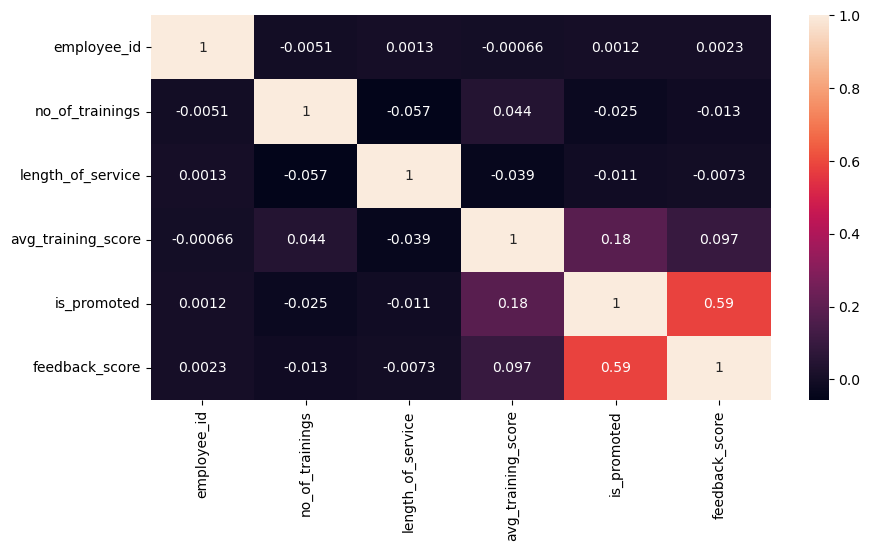

In [16]:
#Correlation
cor = numeric.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot = True)
plt.show()

In [17]:
#designations in the company
df['designation'].value_counts()

designation
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

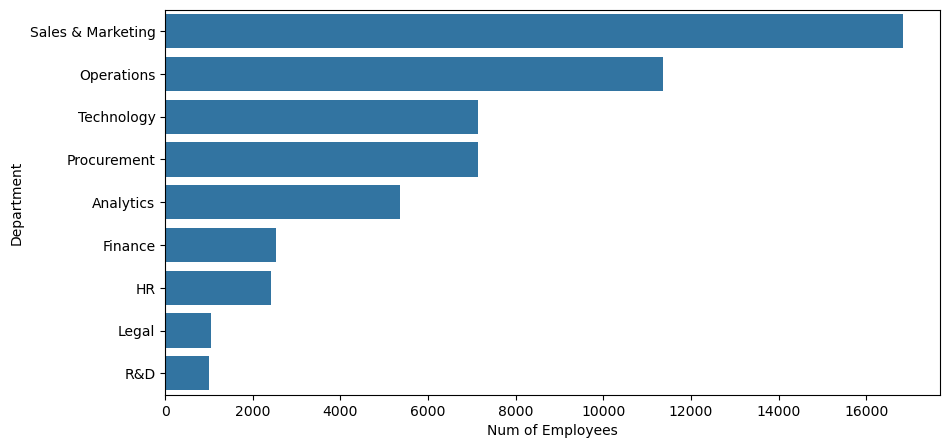

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel('Num of Employees')
plt.ylabel('Department')
sns.barplot(x=df['designation'].value_counts().values,
            y=df['designation'].value_counts().index)
plt.show()

In [20]:
#Promoted Employees
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

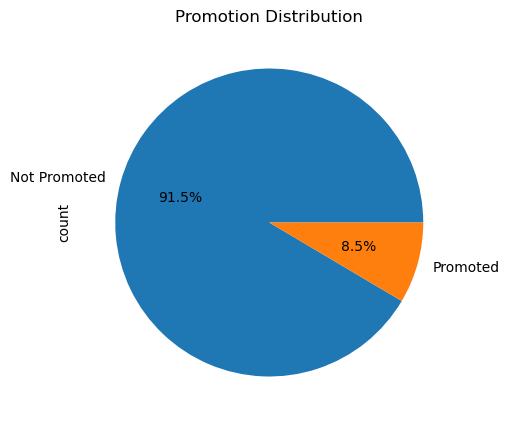

In [21]:
plt.figure(figsize=(5, 5))
df['is_promoted'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Promoted', 'Promoted'])
plt.title('Promotion Distribution')
plt.show()

In [23]:
# Promotion in each Department
df.groupby(['designation', 'is_promoted']).size().reset_index(name='count')

,designation,is_promoted,count
0,Analytics,0,4840
1,Analytics,1,512
2,Finance,0,2330
3,Finance,1,206
4,HR,0,2282
5,HR,1,136
6,Legal,0,986
7,Legal,1,53
8,Operations,0,10325
9,Operations,1,1023


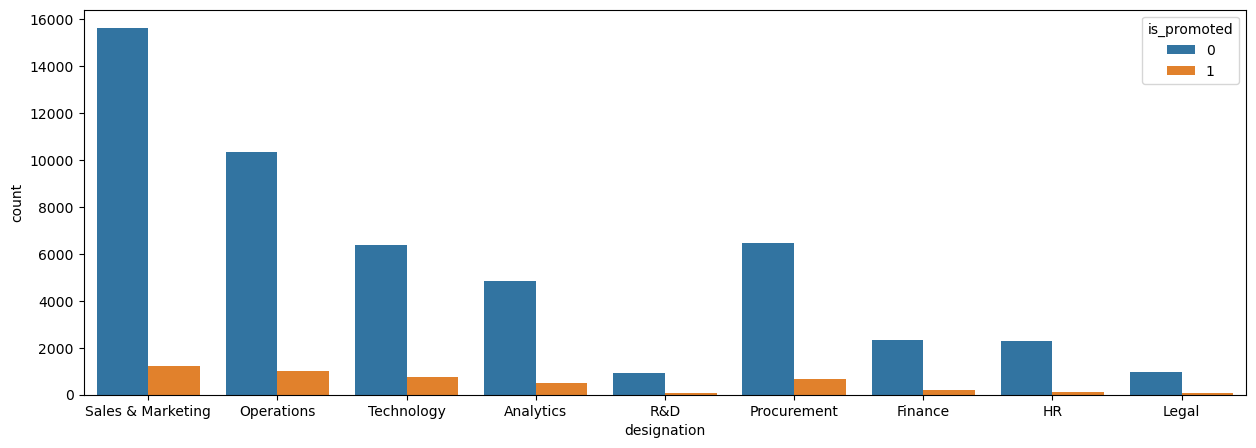

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df["designation"],hue=df["is_promoted"])
plt.show()

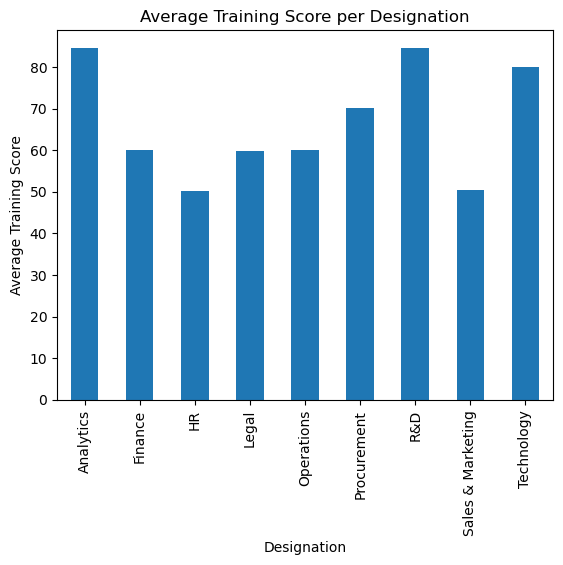

In [46]:
#Average Training Score per Designation
df['avg_training_score'] = pd.to_numeric(df['avg_training_score'], errors='coerce')
avg_score_per_designation = df.groupby('designation')['avg_training_score'].mean()
avg_score_per_designation.plot(kind='bar', title='Average Training Score per Designation')
plt.xlabel('Designation')
plt.ylabel('Average Training Score')
plt.show()

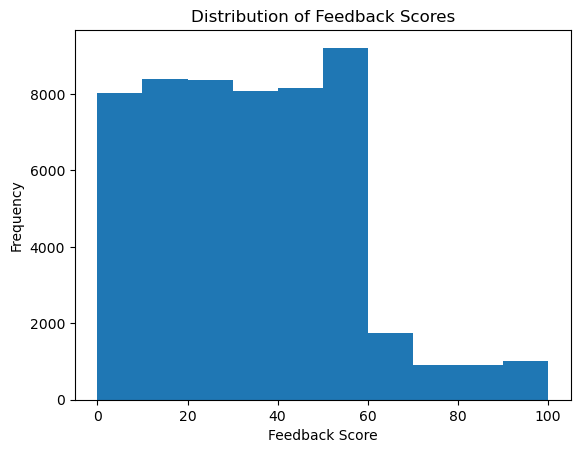

In [41]:
#Feedback Score Distribution
df['feedback_score'].plot(kind='hist', bins=10, title='Distribution of Feedback Scores')
plt.xlabel('Feedback Score')
plt.show()

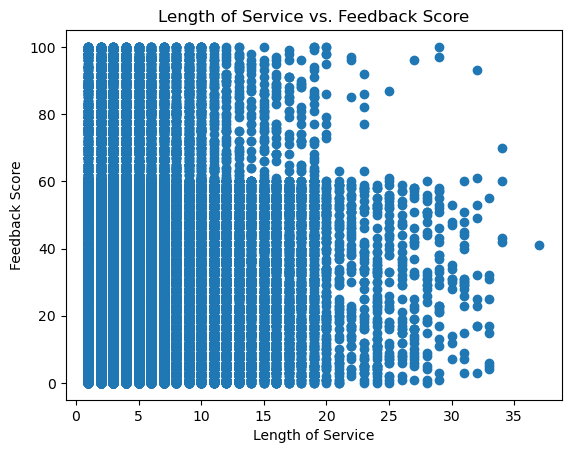

In [42]:
#Length of Service vs. Feedback Score
plt.scatter(df['length_of_service'], df['feedback_score'])
plt.title('Length of Service vs. Feedback Score')
plt.xlabel('Length of Service')
plt.ylabel('Feedback Score')
plt.show()

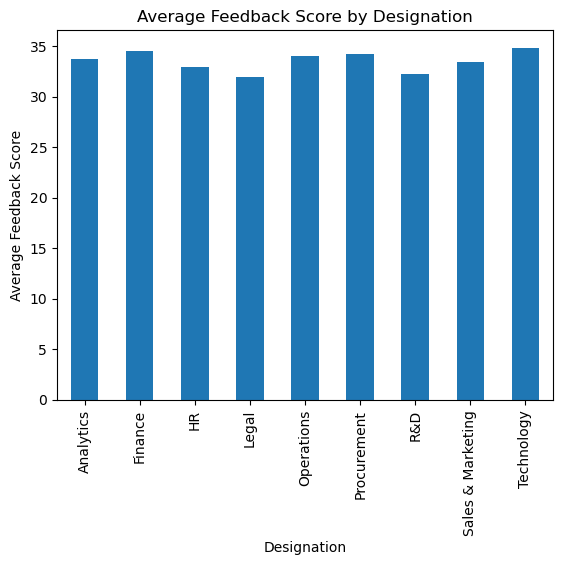

In [43]:
# Average Feedback Score by Designation
avg_feedback_per_designation = df.groupby('designation')['feedback_score'].mean()
avg_feedback_per_designation.plot(kind='bar', title='Average Feedback Score by Designation')
plt.xlabel('Designation')
plt.ylabel('Average Feedback Score')
plt.show()

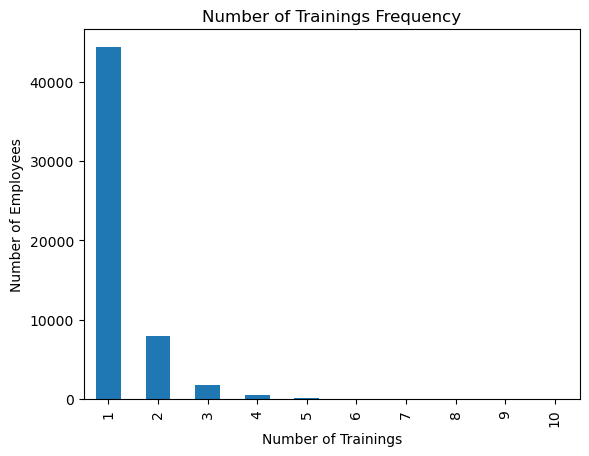

In [44]:
#Training Frequency Analysis
df['no_of_trainings'].value_counts().sort_index().plot(kind='bar', title='Number of Trainings Frequency')
plt.xlabel('Number of Trainings')
plt.ylabel('Number of Employees')
plt.show()

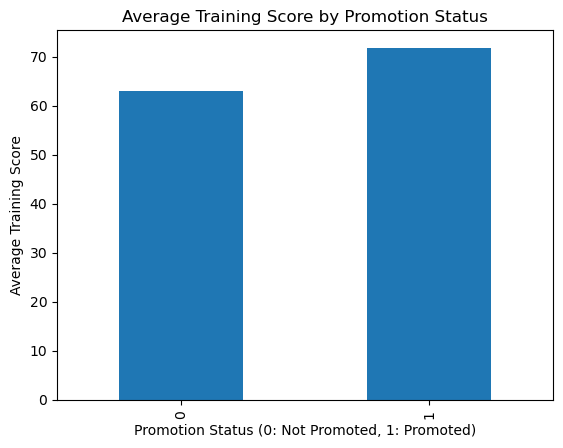

In [48]:
#Comparison of Average Training Scores Between Promoted and Non-Promoted Employees
avg_score_by_promotion = df.groupby('is_promoted')['avg_training_score'].mean()
avg_score_by_promotion.plot(kind='bar', title='Average Training Score by Promotion Status')
plt.xlabel('Promotion Status (0: Not Promoted, 1: Promoted)')
plt.ylabel('Average Training Score')
plt.show()

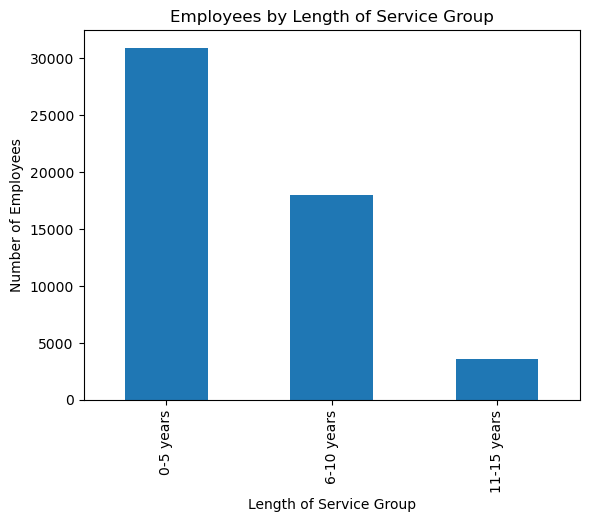

In [49]:
#Age Group Analysis (Based on Length of Service)
bins = [0, 5, 10, 15]
labels = ['0-5 years', '6-10 years', '11-15 years']
df['service_group'] = pd.cut(df['length_of_service'], bins=bins, labels=labels)
df['service_group'].value_counts().plot(kind='bar', title='Employees by Length of Service Group')
plt.xlabel('Length of Service Group')
plt.ylabel('Number of Employees')
plt.show()

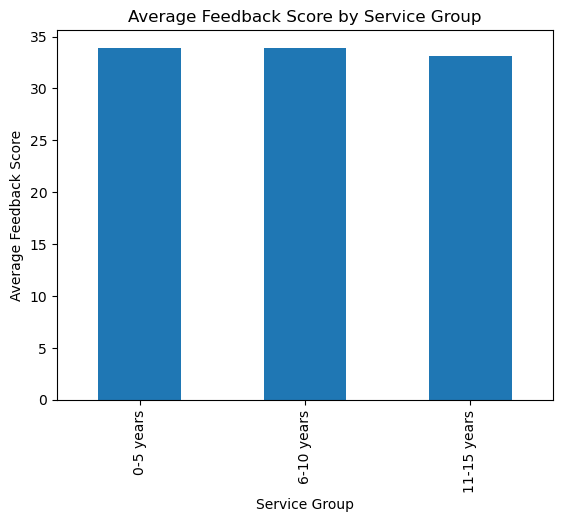

In [50]:
#Feedback Score by Service Group
avg_feedback_by_service_group = df.groupby('service_group')['feedback_score'].mean()
avg_feedback_by_service_group.plot(kind='bar', title='Average Feedback Score by Service Group')
plt.xlabel('Service Group')
plt.ylabel('Average Feedback Score')
plt.show()

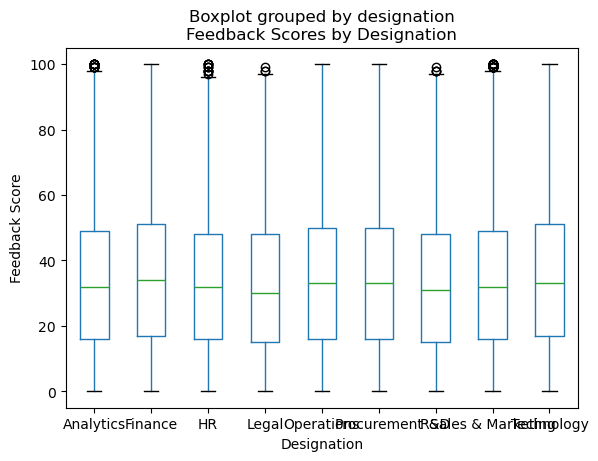

In [51]:
#Boxplot of Feedback Scores by Designation
df.boxplot(column='feedback_score', by='designation', grid=False)
plt.title('Feedback Scores by Designation')
plt.xlabel('Designation')
plt.ylabel('Feedback Score')
plt.show()


In [52]:
#Top 5 Designations by Average Training Score
top_5_designations = df.groupby('designation')['avg_training_score'].mean().sort_values(ascending=False).head(5)
print(top_5_designations)

designation
Analytics      84.602952
R&D            84.596597
Technology     79.928692
Procurement    70.126279
Operations     60.118521
Name: avg_training_score, dtype: float64


## Data Pre-Processing

In [25]:
df.isnull().sum()

employee_id              0
designation              0
no_of_trainings          0
length_of_service        0
avg_training_score    2560
is_promoted              0
feedback_score           0
dtype: int64

In [26]:
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].median)

In [27]:
df.isnull().sum()

employee_id           0
designation           0
no_of_trainings       0
length_of_service     0
avg_training_score    0
is_promoted           0
feedback_score        0
dtype: int64

In [28]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,employee_id,no_of_trainings,length_of_service,is_promoted,feedback_score,designation_Analytics,designation_Finance,designation_HR,designation_Legal,designation_Operations,...,avg_training_score_66.0,avg_training_score_95.0,avg_training_score_42.0,avg_training_score_96.0,avg_training_score_40.0,avg_training_score_99.0,avg_training_score_43.0,avg_training_score_97.0,avg_training_score_41.0,avg_training_score_98.0
0,65438,1,8,0,38,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,65141,1,4,0,51,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,7513,1,7,0,28,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2542,2,10,0,14,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,48945,1,2,0,42,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
features = [col for col in df_encoded.columns if col != 'is_promoted']

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature].values.reshape(-1, 1))
    df_encoded[feature] = scaler.transform(df_encoded[feature].values.reshape(-1, 1))

df_encoded.head()

,employee_id,no_of_trainings,length_of_service,is_promoted,feedback_score,designation_Analytics,designation_Finance,designation_HR,designation_Legal,designation_Operations,...,avg_training_score_66.0,avg_training_score_95.0,avg_training_score_42.0,avg_training_score_96.0,avg_training_score_40.0,avg_training_score_99.0,avg_training_score_43.0,avg_training_score_97.0,avg_training_score_41.0,avg_training_score_98.0
0,1.161858,-0.415276,0.500460,0,0.193171,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
1,1.148709,-0.415276,-0.437395,0,0.800117,-0.328964,-0.220262,-0.214834,-0.139009,1.956975,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
2,-1.402741,-0.415276,0.265996,0,-0.273711,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
3,-1.622829,1.226063,0.969387,0,-0.927346,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
4,0.431639,-0.415276,-0.906322,0,0.379924,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991


## Model Building

In [30]:
x = df_encoded.drop(columns=['is_promoted','employee_id'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40,shuffle=True)

In [32]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [33]:
model1 = LogisticRegression()
model2= GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = DecisionTreeClassifier(max_depth=12)

In [53]:
def predicting(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Display coefficients or feature importances
    if isinstance(model, LogisticRegression):
        # Coefficients for Logistic Regression
        coefficients = model.coef_[0]
        coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})
        coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
        top_5 = coef_df.sort_values(by='AbsCoefficient', ascending=False).head(5)
        print("\nTop 5 Coefficients:\n", top_5)
        
    else:
        # Feature importance for other models
        importance = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})
        top_5 = importance_df.sort_values(by='Importance', ascending=False).head(5)
        print("\nTop 5 Feature Importances:\n", top_5)

In [54]:
predicting(model1)

Accuracy: 0.9836708629812078
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10081
           1       0.98      0.81      0.89       881

    accuracy                           0.98     10962
   macro avg       0.98      0.91      0.94     10962
weighted avg       0.98      0.98      0.98     10962


Top 5 Coefficients:
                           Feature  Coefficient  AbsCoefficient
2                  feedback_score     6.865497        6.865497
10  designation_Sales & Marketing     1.525784        1.525784
3           designation_Analytics    -1.430787        1.430787
11         designation_Technology    -1.309544        1.309544
12        avg_training_score_49.0    -0.798184        0.798184


In [55]:
predicting(model2)

Accuracy: 0.9843094325852947
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10081
           1       1.00      0.81      0.89       881

    accuracy                           0.98     10962
   macro avg       0.99      0.90      0.94     10962
weighted avg       0.98      0.98      0.98     10962


Top 5 Feature Importances:
                     Feature  Importance
2            feedback_score    0.973478
45  avg_training_score_91.0    0.003549
51  avg_training_score_90.0    0.002868
60  avg_training_score_94.0    0.002713
69  avg_training_score_97.0    0.002533


In [56]:
predicting(model3)

Accuracy: 0.9840357598978289
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10081
           1       0.95      0.85      0.90       881

    accuracy                           0.98     10962
   macro avg       0.97      0.92      0.94     10962
weighted avg       0.98      0.98      0.98     10962


Top 5 Feature Importances:
                     Feature  Importance
2            feedback_score    0.807307
1         length_of_service    0.052916
52  avg_training_score_92.0    0.007955
0           no_of_trainings    0.007717
60  avg_training_score_94.0    0.007238


In [57]:
predicting(model4)

Accuracy: 0.9842182083561394
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10081
           1       1.00      0.80      0.89       881

    accuracy                           0.98     10962
   macro avg       0.99      0.90      0.94     10962
weighted avg       0.98      0.98      0.98     10962


Top 5 Feature Importances:
                     Feature  Importance
2            feedback_score    0.966867
45  avg_training_score_91.0    0.004299
60  avg_training_score_94.0    0.003483
51  avg_training_score_90.0    0.003482
69  avg_training_score_97.0    0.003202


In [73]:
def predict_promotion(model, employee_data):
    # Create a DataFrame for the new employee data
    employee_df = pd.DataFrame([employee_data])
    
    # Perform one-hot encoding
    employee_encoded = pd.get_dummies(employee_df)
    
    # Add missing columns that exist in the training data
    for col in x.columns:
        if col not in employee_encoded.columns:
            employee_encoded[col] = 0
    
    # Align the columns to match the training data
    employee_encoded = employee_encoded[x.columns]
    
    # Standardize numerical features
    numeric_features = [col for col in features if col in employee_encoded.columns]
    for feature in numeric_features:
        scaler = StandardScaler()
        scaler.fit(df_encoded[[feature]])  # Fit the scaler using the original training data
        employee_encoded[feature] = scaler.transform(employee_encoded[[feature]])
    
    # Predict promotion
    prediction = model.predict(employee_encoded)
    return "Promoted" if prediction[0] == 1 else "Not Promoted"

# Example usage
new_employee = {
    'designation': 'Admin',
    'no_of_trainings': 1,
    'length_of_service': 0,
    'avg_training_score': 10.0,
    'feedback_score': 10
}

# Make a prediction using the logistic regression model
print("\nPrediction for new employee:", predict_promotion(model1, new_employee))




Prediction for new employee: Promoted
